In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import gzip
import glob
import torch
import torch.nn as nn
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt


In [3]:
!pip install scprep

     |████████████████████████████████| 104 kB 22.4 MB/s 


In [4]:
import scprep as scp
# The scprep require data of format (# of samples, # of features)

In [5]:
ped_expression_1000 = pd.read_csv("/content/drive/MyDrive/ML4fungen/Final project/ped_expression_1000_test.csv", index_col=0, header=None, )
adult_expression_1000 = pd.read_csv("/content/drive/MyDrive/ML4fungen/Final project/adult_expression_1000_test.csv", index_col=0, header=None, )


In [6]:
genes_list = ped_expression_1000.index

In [7]:
print(ped_expression_1000.astype(bool).sum(axis=1))

0
MAGEA3        86
MAGEA12       78
IGF2-AS      218
HENMT1       256
MAGEA2B       43
            ... 
COL6A6        29
PCDHGA3      131
LOC730811     29
CLVS1        162
GPC5          42
Length: 1000, dtype: int64


In [8]:
adult_expression_1000.astype(bool).sum(axis=1)

0
MAGEA3         3
MAGEA12        3
IGF2-AS        4
HENMT1        10
MAGEA2B        2
            ... 
COL6A6       140
PCDHGA3      827
LOC730811    133
CLVS1        811
GPC5         199
Length: 1000, dtype: int64

In [9]:
ped_expression_1000

,1,2,3,4,5,6,7,8,9,10,...,1938,1939,1940,1941,1942,1943,1944,1945,1946,1947
0,,,,,,,,,,,,,,,,,,,,,
MAGEA3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,...,0.0,0.00000,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
MAGEA12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,...,0.0,0.00000,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
IGF2-AS,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,...,0.0,0.00000,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
HENMT1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,...,0.0,0.00000,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
MAGEA2B,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,...,0.0,0.00000,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
COL6A6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,...,0.0,0.00000,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
PCDHGA3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.06527,...,0.0,0.00000,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
LOC730811,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,...,0.0,0.00000,0.00000,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


# Perform some data visualization

### Measure the number of cells in which each gene has non-negligible counts.



In [10]:
capture_count_ped = scp.measure.gene_capture_count(ped_expression_1000.T)
capture_count_adult = scp.measure.gene_capture_count(adult_expression_1000.T)

In [11]:
capture_count_ped

0
MAGEA3        86
MAGEA12       78
IGF2-AS      218
HENMT1       256
MAGEA2B       43
            ... 
COL6A6        29
PCDHGA3      131
LOC730811     29
CLVS1        162
GPC5          42
Name: capture_count, Length: 1000, dtype: int64

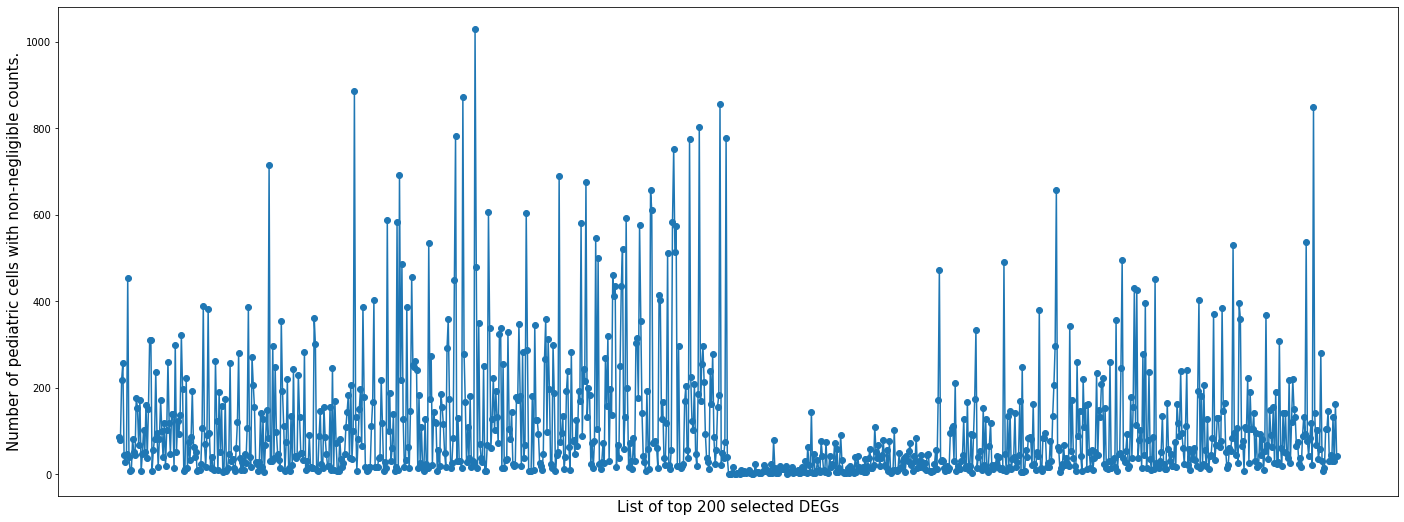

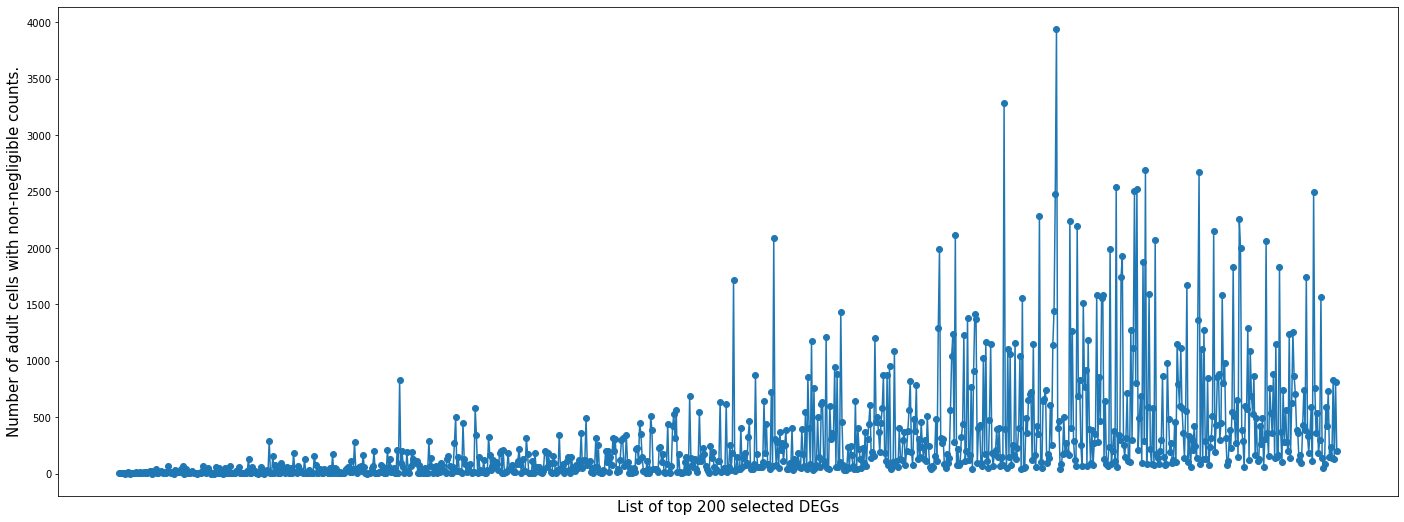

In [12]:
plt.figure(figsize=(24, 9))
plt.plot(capture_count_ped, 'o-')

ax = plt.gca()
ax.axes.xaxis.set_ticks([])
# ax.axes.yaxis.set_ticks([])

plt.xlabel("List of top 200 selected DEGs", fontsize=15)
plt.ylabel("Number of pediatric cells with non-negligible counts.", fontsize=15)   
plt.show()

plt.figure(figsize=(24, 9))
plt.plot(capture_count_adult, 'o-')

ax = plt.gca()
ax.axes.xaxis.set_ticks([])
# ax.axes.yaxis.set_ticks([])

plt.xlabel("List of top 200 selected DEGs", fontsize=15)
plt.ylabel("Number of adult cells with non-negligible counts.", fontsize=15)   
plt.show()

### Measure the expression of a set of genes in each cell.

In [ ]:
# Measure the expression of a set of genes in each cell.
gene_set_expression_ped = scp.measure.gene_set_expression(ped_expression_1000.T)
gene_set_expression_adult = scp.measure.gene_set_expression(adult_expression_1000.T)

/usr/local/lib/python3.7/dist-packages/scprep/select.py:370: UserWarning: No selection conditions provided. Returning all columns.
  "No selection conditions provided. Returning all columns.", UserWarning
/usr/local/lib/python3.7/dist-packages/scprep/select.py:370: UserWarning: No selection conditions provided. Returning all columns.
  "No selection conditions provided. Returning all columns.", UserWarning


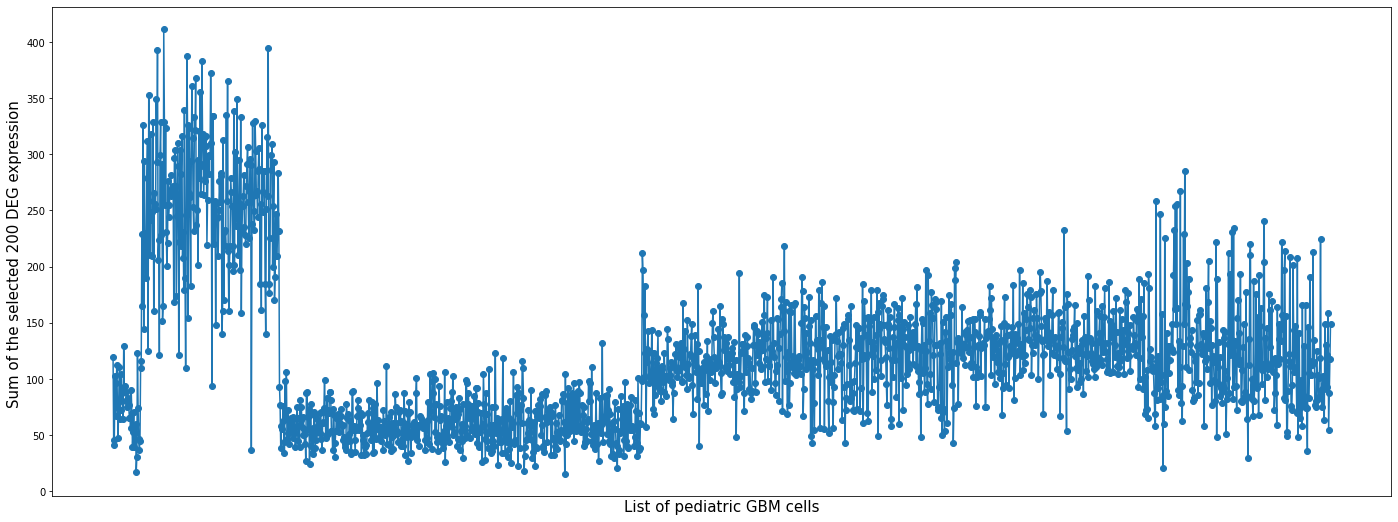

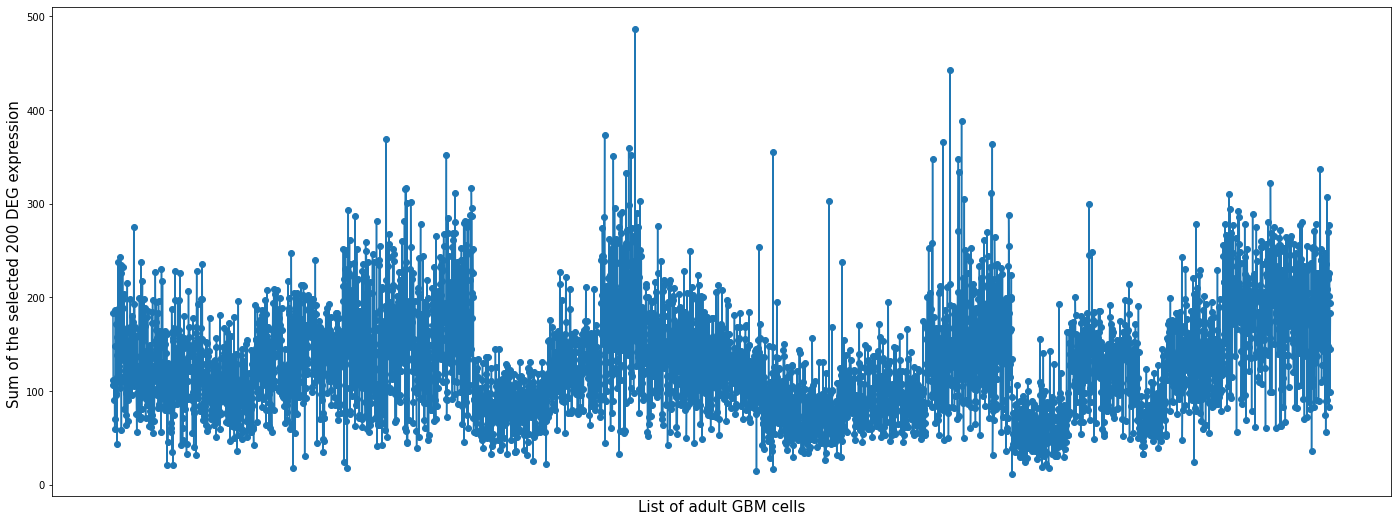

In [ ]:
plt.figure(figsize=(24, 9))
plt.plot(gene_set_expression_ped, 'o-')

ax = plt.gca()
ax.axes.xaxis.set_ticks([])
# ax.axes.yaxis.set_ticks([])

plt.xlabel("List of pediatric GBM cells", fontsize=15)
plt.ylabel("Sum of the selected 200 DEG expression ", fontsize=15)   
plt.show()

plt.figure(figsize=(24, 9))
plt.plot(gene_set_expression_adult, 'o-')

ax = plt.gca()
ax.axes.xaxis.set_ticks([])
# ax.axes.yaxis.set_ticks([])

plt.xlabel("List of adult GBM cells", fontsize=15)
plt.ylabel("Sum of the selected 200 DEG expression ", fontsize=15)   
plt.show()


### Measure the variability of each gene in a dataset.


In [ ]:
variability_ped = scp.measure.gene_variability(ped_expression_1000.T)
variability_adult = scp.measure.gene_variability(adult_expression_1000.T)

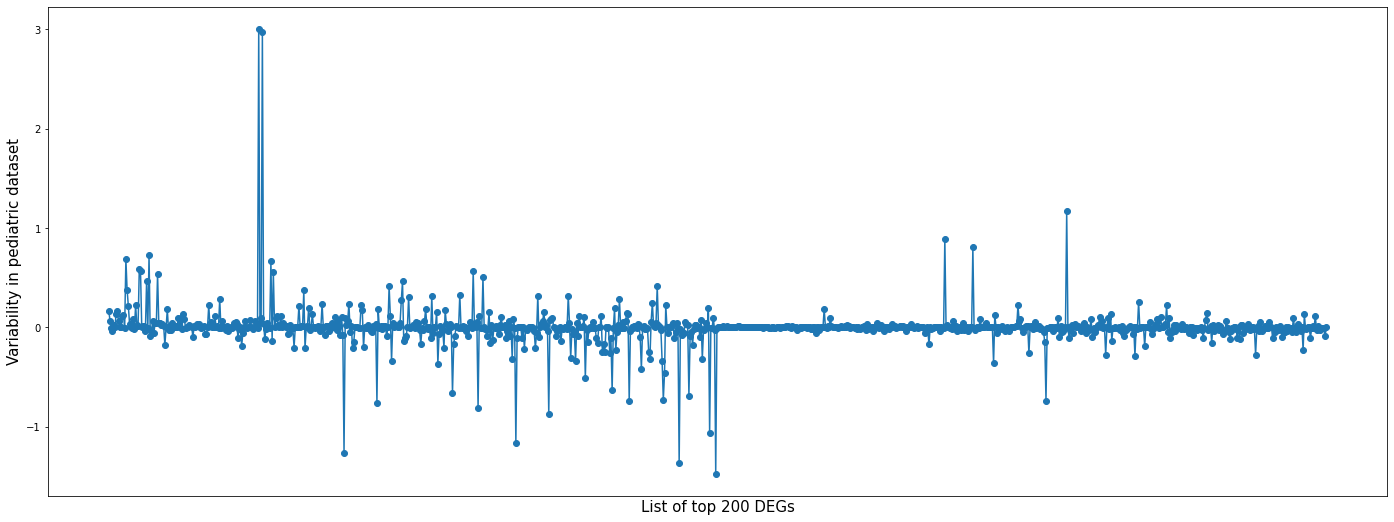

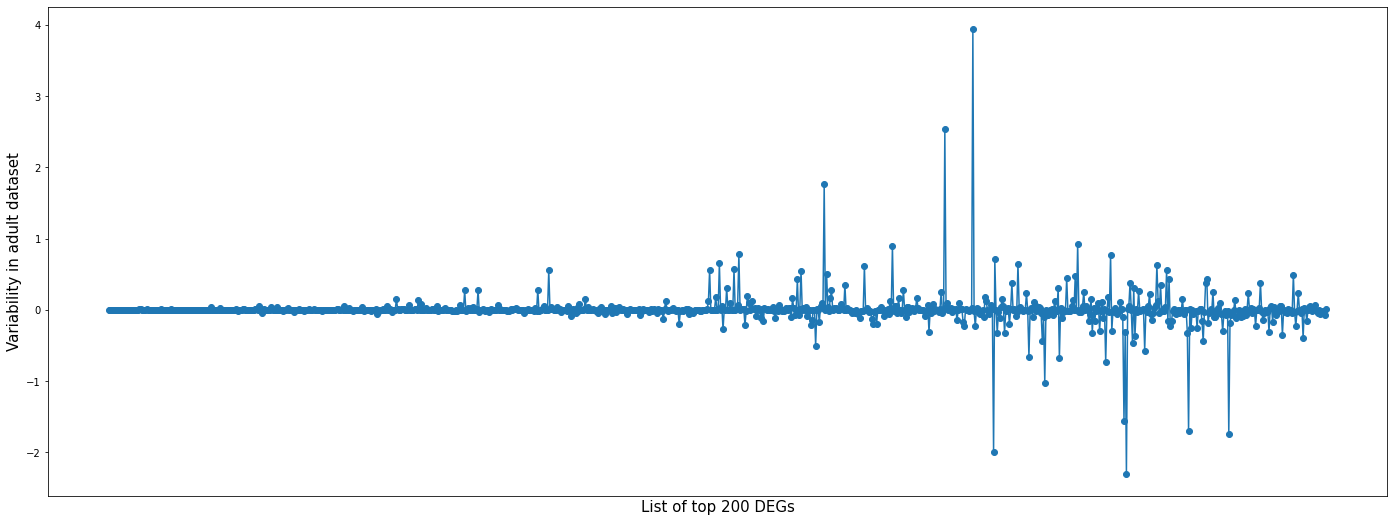

In [ ]:
plt.figure(figsize=(24, 9))
plt.plot(variability_ped, 'o-')

ax = plt.gca()
ax.axes.xaxis.set_ticks([])
# ax.axes.yaxis.set_ticks([])
plt.xlabel("List of top 200 DEGs", fontsize=15)
plt.ylabel("Variability in pediatric dataset", fontsize=15)   
plt.show()

plt.figure(figsize=(24, 9))
plt.plot(variability_adult, 'o-')

ax = plt.gca()
ax.axes.xaxis.set_ticks([])
# ax.axes.yaxis.set_ticks([])
plt.xlabel("List of top 200 DEGs", fontsize=15)
plt.ylabel("Variability in adult dataset", fontsize=15)   
plt.show()

# Perform data filtering

### Filter all genes with zero counts across all cells.


In [8]:
# Looks like none of the genes are filtered out! 
ped_expression_1000 = scp.filter.filter_empty_genes(ped_expression_1000.T)
adult_expression_1000 = scp.filter.filter_empty_genes(adult_expression_1000.T)

# this filtering technique is equivalent to: 
# ped_expression_200.loc[:, (ped_expression_200 != 0).any(axis=0)]

### Remove all cells with zero library size.

In [9]:
# Looks like we filtered out several "empty" cells
ped_expression_1000_filtered = scp.filter.filter_empty_cells(ped_expression_1000)
adult_expression_1000_filtered = scp.filter.filter_empty_cells(adult_expression_1000)

### IMPORTANT: Other filtering method that I could try (things to try in the future): 
1. Remove cells with total expression of a gene set above or below a threshold.

2. Filter all genes with negligible counts in all but a few cells (rare genes)

But for now, I'll do the basics -- just filter out genes with zero counts and zero library size. 

# Merge the pediatric dataset with the adult dataset

In [10]:
print("shape of the ped dataset: ", ped_expression_1000_filtered.shape)
print("shape of the adult dataset: ", adult_expression_1000_filtered.shape)

shape of the ped dataset:  (1947, 1000)
shape of the adult dataset:  (4916, 1000)


In [11]:
(ped_expression_1000_filtered.shape[0])

1947

### IMPORTANT: Assign class name to pediatric and adult malignant cells

0: pediatric GBM 

1: adult GBM

In [12]:
class_ped = np.zeros(ped_expression_1000_filtered.shape[0], dtype=int)
ped_expression_1000_filtered['class'] = class_ped

class_adult = np.ones(adult_expression_1000_filtered.shape[0], dtype=int)
adult_expression_1000_filtered['class'] = class_adult

### merge the two datasets into a combined dataset

In [13]:
frames = [ped_expression_1000_filtered, adult_expression_1000_filtered]

expression_combined = pd.concat(frames)

### Fix the index of the combined dataset, because we have filtered out some data, now the indices are messed up

In [14]:
expression_combined.index = range(len(expression_combined))

In [15]:
expression_combined

,MAGEA3,MAGEA12,IGF2-AS,HENMT1,MAGEA2B,MAGEA2,DIO3,KHDRBS2,CLEC10A,NPBWR2,...,PLD5,EVA1C,LOC100506497,LOC100873065,COL6A6,PCDHGA3,LOC730811,CLVS1,GPC5,class
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,...,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.00000,0.00000,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,...,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.00000,0.00000,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,...,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.00000,0.00000,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,...,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.00000,0.00000,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.03101,0.0,0.0,...,0.0,0.00000,0.0,0.0,0.0,0.000000,0.0,0.00000,0.00000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6858,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,...,0.0,2.23836,0.0,0.0,0.0,0.816730,0.0,3.34338,0.00000,1
6859,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,...,0.0,1.29283,0.0,0.0,0.0,0.000000,0.0,0.00000,0.00000,1
6860,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,...,0.0,0.00000,0.0,0.0,0.0,2.540050,0.0,0.00000,1.87897,1
6861,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,...,0.0,0.00000,0.0,0.0,0.0,0.387715,0.0,0.00000,0.00000,1


### create the label dataset

In [16]:
y = expression_combined['class']

In [17]:
dataset = expression_combined.drop('class', 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


# Use the extracted features

In [18]:
common_elements = ['COL1A2',
 'SNAR-B1',
 'MEGF10',
 'PRAME',
 'MET',
 'CTHRC1',
 'RANBP17',
 'NEFL',
 'IGF2',
 'COL1A1',
 'RTN1',
 'CFI',
 'GATA2',
 'HENMT1',
 'TP53TG3',
 'TUSC3',
 'MFAP2',
 'LOC650226',
 'KHDRBS2',
 'LOC389906',
 'HBB']

In [19]:
common_elements.append('class')


In [20]:
new_expression_combined = expression_combined[common_elements]

### Train_test_split

In [21]:
y_new = new_expression_combined['class']

In [22]:
new_dataset = new_expression_combined.drop('class', 1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  """Entry point for launching an IPython kernel.


In [23]:
from sklearn.model_selection import train_test_split
y_train_new, y_test_new = train_test_split(y_new, test_size=0.33, random_state=42, stratify=y_new)
X_train_new = new_dataset.loc[y_train_new.index]
X_test_new = new_dataset.loc[y_test_new.index]

In [24]:
print("shape of X_train", X_train_new.shape)
print("shape of y_train", y_train_new.shape)
print("shape of X_test", X_test_new.shape)
print("shape of y_test", y_test_new.shape)

shape of X_train (4598, 21)
shape of y_train (4598,)
shape of X_test (2265, 21)
shape of y_test (2265,)


# PCA

In [28]:
from sklearn.decomposition import PCA

pca = PCA()
X_train_pca = pca.fit_transform(X_train_new)
X_test_pca = pca.transform(X_test_new)

In [29]:
explained_variance = pca.explained_variance_ratio_


In [30]:
explained_variance

array([0.25025183, 0.20630904, 0.09688862, 0.06566026, 0.06366023,
       0.04643561, 0.04247599, 0.03861012, 0.02924001, 0.02430181,
       0.02405751, 0.01808662, 0.01476218, 0.01430251, 0.01290622,
       0.01220929, 0.01143753, 0.00979751, 0.00791029, 0.00638159,
       0.00431524])

# KNN with pca

In [31]:
knn = KNeighborsClassifier()
k = np.arange(20)+1
param_knn= [{'n_neighbors':k}]
knn_clf = GridSearchCV(knn, param_knn, cv=5)
knn_clf.fit(X_train_pca,y_train_new)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20])}])

### Print out the best parameters

In [32]:
knn_clf.best_params_

{'n_neighbors': 6}

In [33]:
model_KNN = KNeighborsClassifier(n_neighbors=6)

# training 
model_KNN.fit(X_train_pca,y_train_new)

# prediction
predictions_KNN = model_KNN.predict(X_test_pca)

# accuracy 
print(accuracy_score(y_test_new,predictions_KNN))

0.9492273730684326


# KNN model

In [25]:
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score, GridSearchCV


In [26]:
knn = KNeighborsClassifier()
k = np.arange(20)+1
param_knn= [{'n_neighbors':k}]
knn_clf = GridSearchCV(knn, param_knn, cv=5)
knn_clf.fit(X_train_new,y_train_new)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20])}])

### Print out the best parameters

In [27]:
knn_clf.best_params_

{'n_neighbors': 6}

In [34]:
model_KNN = KNeighborsClassifier(n_neighbors=6)

# training 
model_KNN.fit(X_train_new,y_train_new)

# prediction
predictions_KNN = model_KNN.predict(X_test_new)

# accuracy 
print(accuracy_score(y_test_new,predictions_KNN))

0.9492273730684326


### Visualize the confusion matrix

(2265,)


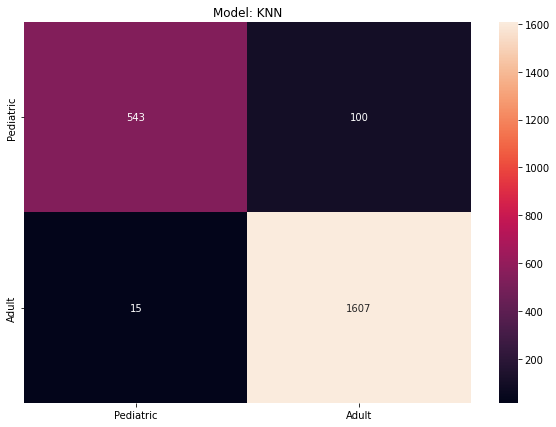

In [35]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

print(y_test_new.shape)
cfn_matrix_knn = confusion_matrix(y_test_new,predictions_KNN)

x_axis_labels = ['Pediatric', 'Adult'] 
y_axis_labels = ['Pediatric', 'Adult']

plt.figure(figsize = (10,7))
plt.title('Model: KNN')
sns.heatmap(cfn_matrix_knn, annot = True, fmt = 'd', xticklabels=x_axis_labels, yticklabels=y_axis_labels)

In [36]:
from sklearn.metrics import classification_report

target_names = ['Pediatric', 'Adult']
print(classification_report(y_test_new, predictions_KNN, target_names=target_names))

              precision    recall  f1-score   support

   Pediatric       0.97      0.84      0.90       643
       Adult       0.94      0.99      0.97      1622

    accuracy                           0.95      2265
   macro avg       0.96      0.92      0.93      2265
weighted avg       0.95      0.95      0.95      2265



# Naive Bayes

In [37]:
model = GaussianNB()

# training 
model.fit(X_train_new,y_train_new)

# prediction
predictions = model.predict(X_test_new)

# accuracy 
print(accuracy_score(y_test_new,predictions))

0.9253863134657837


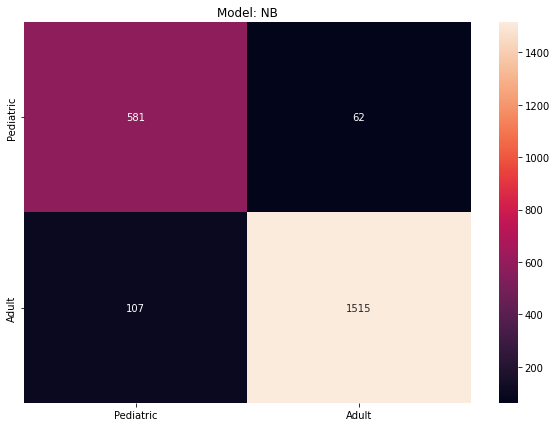

In [38]:
cfn_matrix_NB = confusion_matrix(y_test_new,predictions)

x_axis_labels = ['Pediatric', 'Adult'] 
y_axis_labels = ['Pediatric', 'Adult']

plt.figure(figsize = (10,7))
plt.title('Model: NB')
sns.heatmap(cfn_matrix_NB, annot = True, fmt='d', xticklabels=x_axis_labels, yticklabels=y_axis_labels)

In [39]:
target_names = ['Pediatric', 'Adult']
print(classification_report(y_test_new, predictions, target_names=target_names))

              precision    recall  f1-score   support

   Pediatric       0.84      0.90      0.87       643
       Adult       0.96      0.93      0.95      1622

    accuracy                           0.93      2265
   macro avg       0.90      0.92      0.91      2265
weighted avg       0.93      0.93      0.93      2265



# Logistic regression

In [40]:
from sklearn.linear_model import LogisticRegression

lreg_clf = LogisticRegression(multi_class='auto')

param_grid = {'C': [0.00001,0.0001,0.001,0.01,0.1,1,10,100], 
              'penalty': ['l1', 'l2'], 
              'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
              }

grid_search = GridSearchCV(lreg_clf, param_grid, cv=5, scoring= 'precision_macro' ,return_train_score=True)
grid_search.fit(X_train_new,y_train_new)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Pr

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [1e-05, 0.0001, 0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2'],
                         'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag',
                                    'saga']},
             return_train_score=True, scoring='precision_macro')

In [41]:
X_train_new.shape

(4598, 21)

In [42]:
grid_search.best_params_


{'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}

In [43]:
lreg_clf= LogisticRegression(multi_class='auto', solver='liblinear', C=0.1, penalty= 'l1')
lreg_clf.fit(X_train_new, y_train_new)

LogisticRegression(C=0.1, penalty='l1', solver='liblinear')

In [44]:
from sklearn.metrics import precision_score

y_pred_train = lreg_clf.predict(X_train_new)
y_pred_test = lreg_clf.predict(X_test_new)

lreg_train_precision_score = precision_score(y_train_new, y_pred_train, average='binary')
lreg_test_precision_score = precision_score(y_test_new, y_pred_test, average='binary')

print('Train Precision score: {}'
      .format(lreg_train_precision_score))
print('Test Precision score: {}'
      .format(lreg_test_precision_score))

Train Precision score: 0.957925925925926
Test Precision score: 0.9508393285371702


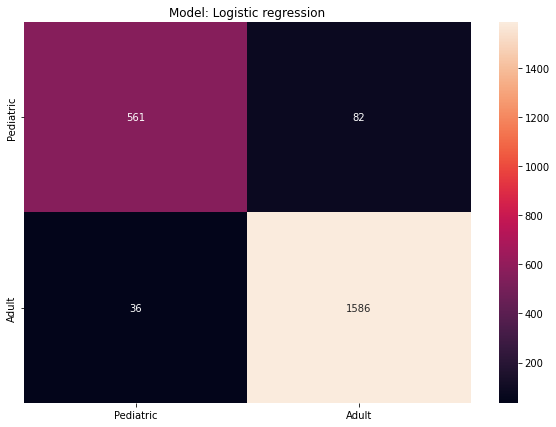

In [45]:
predictions = lreg_clf.predict(X_test_new)

cfn_matrix_NB = confusion_matrix(y_test_new,predictions)

x_axis_labels = ['Pediatric', 'Adult'] 
y_axis_labels = ['Pediatric', 'Adult']

plt.figure(figsize = (10,7))
plt.title('Model: Logistic regression')
sns.heatmap(cfn_matrix_NB, annot = True, fmt='d', xticklabels=x_axis_labels, yticklabels=y_axis_labels)

In [46]:
target_names = ['Pediatric', 'Adult']
print(classification_report(y_test_new, y_pred_test, target_names=target_names))

              precision    recall  f1-score   support

   Pediatric       0.94      0.87      0.90       643
       Adult       0.95      0.98      0.96      1622

    accuracy                           0.95      2265
   macro avg       0.95      0.93      0.93      2265
weighted avg       0.95      0.95      0.95      2265



# Decision tree

In [47]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier()

param_grid = {
            'max_depth': [5, 10, 20, 50, 100], 
            'splitter': ['best', 'random'],
            'min_samples_split':[1,2,3,4,5,10,20],
            'max_features': ['auto', 'sqrt', 'log2', 'None', 'int', 'float'],
            }

grid_search_decision_tree = GridSearchCV(decision_tree, param_grid, cv = 5, return_train_score=True, verbose = 4, scoring = "accuracy", refit = True)
grid_search_decision_tree.fit(X_train_new,y_train_new)

Fitting 5 folds for each of 420 candidates, totalling 2100 fits
[CV 1/5] END max_depth=5, max_features=auto, min_samples_split=1, splitter=best;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/5] END max_depth=5, max_features=auto, min_samples_split=1, splitter=best;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/5] END max_depth=5, max_features=auto, min_samples_split=1, splitter=best;, score=(train=nan, test=nan) total time=   0.0s
[CV 4/5] END max_depth=5, max_features=auto, min_samples_split=1, splitter=best;, score=(train=nan, test=nan) total time=   0.0s
[CV 5/5] END max_depth=5, max_features=auto, min_samples_split=1, splitter=best;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/5] END max_depth=5, max_features=auto, min_samples_split=1, splitter=random;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/5] END max_depth=5, max_features=auto, min_samples_split=1, splitter=random;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/5] END max_depth=5, max

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
1200 fits failed out of a total of 2100.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
300 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 942, in fit
    X_idx_sorted=X_idx_sorted,
  File "/usr/local/lib/python3.7/dist-packages/sklearn/tree/_classes.py", line 254, in fit
    % self.min_samples_split
ValueError: min_samples_split must be an integer greater than 1 or a fl

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [5, 10, 20, 50, 100],
                         'max_features': ['auto', 'sqrt', 'log2', 'None', 'int',
                                          'float'],
                         'min_samples_split': [1, 2, 3, 4, 5, 10, 20],
                         'splitter': ['best', 'random']},
             return_train_score=True, scoring='accuracy', verbose=4)

In [48]:
print(grid_search_decision_tree.best_params_)

{'max_depth': 20, 'max_features': 'auto', 'min_samples_split': 2, 'splitter': 'best'}


In [49]:
optimized_dt = DecisionTreeClassifier(max_depth = 20, max_features = 'auto', min_samples_split = 2, splitter = 'best')
optimized_dt.fit(X_train_new,y_train_new)

print('Train score: ', optimized_dt.score(X_train_new,y_train_new))
print('Test score: ', optimized_dt.score(X_test_new, y_test_new))

Train score:  0.9915180513266638
Test score:  0.9373068432671081


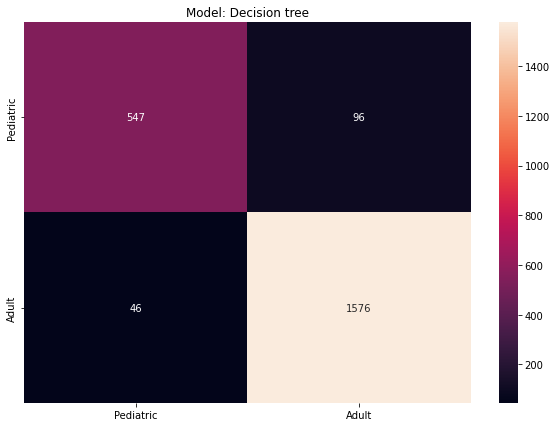

In [50]:
predictions_dt = optimized_dt.predict(X_test_new)

cfn_matrix_dt = confusion_matrix(y_test_new,predictions_dt)

x_axis_labels = ['Pediatric', 'Adult'] 
y_axis_labels = ['Pediatric', 'Adult']


plt.figure(figsize = (10,7))
plt.title('Model: Decision tree')
sns.heatmap(cfn_matrix_dt, annot = True, fmt='d', xticklabels=x_axis_labels, yticklabels=y_axis_labels)

In [51]:
target_names = ['Pediatric', 'Adult']
print(classification_report(y_test_new, predictions_dt, target_names=target_names))

              precision    recall  f1-score   support

   Pediatric       0.92      0.85      0.89       643
       Adult       0.94      0.97      0.96      1622

    accuracy                           0.94      2265
   macro avg       0.93      0.91      0.92      2265
weighted avg       0.94      0.94      0.94      2265



In [52]:
feature_importances_dt = pd.DataFrame(optimized_dt.feature_importances_,
                                   index = X_train_new.columns,
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)

In [53]:
feature_importances_dt.head(10)


,importance
0,
TUSC3,0.260093
IGF2,0.172011
LOC650226,0.081201
HBB,0.066684
KHDRBS2,0.056998
NEFL,0.038965
CTHRC1,0.037336
COL1A2,0.034554
CFI,0.032095


# Random Forest model

In [54]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(random_state=0)

param_grid ={
          'max_depth': [6,8,10,12,14],
           'n_estimators':[100,200,300,400,500]}

grid_search = GridSearchCV(rf_clf, param_grid,cv=5, scoring='precision_macro', return_train_score=True)
grid_search.fit(X_train_new,y_train_new)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [6, 8, 10, 12, 14],
                         'n_estimators': [100, 200, 300, 400, 500]},
             return_train_score=True, scoring='precision_macro')

In [ ]:
grid_search.best_params_

{'max_depth': 14, 'n_estimators': 500}

In [55]:
rf_clf = RandomForestClassifier(n_estimators=500, max_depth=14)
rf_clf.fit(X_train_new, y_train_new)

RandomForestClassifier(max_depth=14, n_estimators=500)

In [56]:
from sklearn.metrics import precision_score

y_pred_train = rf_clf.predict(X_train_new)
y_pred_test = rf_clf.predict(X_test_new)

rf_train_precision_score = precision_score(y_train_new, y_pred_train, average='binary')
rf_test_precision_score = precision_score(y_test_new, y_pred_test, average='binary')

print('Train Precision score: {}'
      .format(rf_train_precision_score))
print('Test Precision score: {}'
      .format(rf_test_precision_score))


Train Precision score: 0.9803571428571428
Test Precision score: 0.9602888086642599


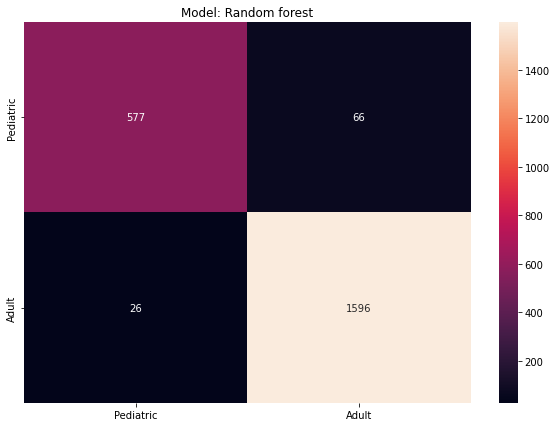

In [57]:
predictions_rf = rf_clf.predict(X_test_new)

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

cfn_matrix_rf = confusion_matrix(y_test_new,predictions_rf)

x_axis_labels = ['Pediatric', 'Adult'] 
y_axis_labels = ['Pediatric', 'Adult']


plt.figure(figsize = (10,7))
plt.title('Model: Random forest')
sns.heatmap(cfn_matrix_rf, annot = True, fmt='d', xticklabels=x_axis_labels, yticklabels=y_axis_labels)

In [58]:
target_names = ['Pediatric', 'Adult']
print(classification_report(y_test_new, predictions_rf, target_names=target_names))

              precision    recall  f1-score   support

   Pediatric       0.96      0.90      0.93       643
       Adult       0.96      0.98      0.97      1622

    accuracy                           0.96      2265
   macro avg       0.96      0.94      0.95      2265
weighted avg       0.96      0.96      0.96      2265



In [59]:
feature_importances_rf = pd.DataFrame(rf_clf.feature_importances_,
                                   index = X_train_new.columns,
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)

In [60]:
feature_importances_rf.head(10)


,importance
0,
IGF2,0.130505
TUSC3,0.116197
KHDRBS2,0.085219
RTN1,0.083382
CTHRC1,0.082888
SNAR-B1,0.061911
COL1A2,0.053552
LOC650226,0.045295
NEFL,0.039340


# Linear SVM

In [61]:
model = LinearSVC()

# training 
model.fit(X_train_new,y_train_new)

# prediction
predictions = model.predict(X_test_new)

# accuracy 
print(accuracy_score(y_test_new,predictions))

0.9470198675496688


/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


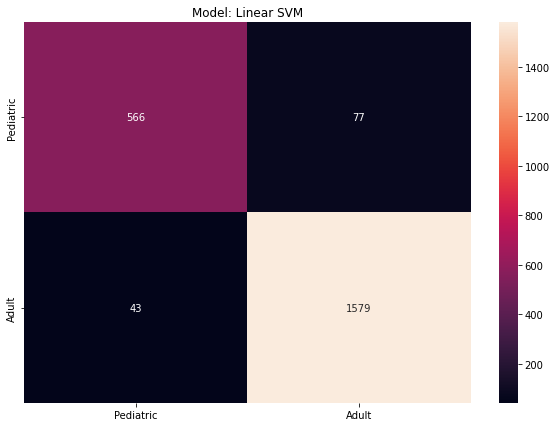

In [62]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

cfn_matrix_linear_svm = confusion_matrix(y_test_new,predictions)

x_axis_labels = ['Pediatric', 'Adult'] 
y_axis_labels = ['Pediatric', 'Adult']


plt.figure(figsize = (10,7))
plt.title('Model: Linear SVM')
sns.heatmap(cfn_matrix_linear_svm, annot = True, fmt='d', xticklabels=x_axis_labels, yticklabels=y_axis_labels)

# Kernalized SVM

In [63]:
from sklearn import svm

KSVC_clf = svm.SVC(kernel='rbf', random_state=0)

param_grid = {'C': [0.0001,0.001,0.01,0.1,1,10],
          'gamma': [0.0001,0.001,0.1,1,10]}

grid_search = GridSearchCV(KSVC_clf, param_grid, cv=5, scoring= 'precision_macro', return_train_score=True)
grid_search.fit(X_train_new,y_train_new)

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Pr

GridSearchCV(cv=5, estimator=SVC(random_state=0),
             param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10],
                         'gamma': [0.0001, 0.001, 0.1, 1, 10]},
             return_train_score=True, scoring='precision_macro')

In [64]:
grid_search.best_params_

{'C': 10, 'gamma': 0.001}

In [65]:
KSVC_clf = svm.SVC(kernel='rbf',C=10,gamma=0.001, probability=True, random_state=0)

KSVC_clf.fit(X_train_new, y_train_new)

SVC(C=10, gamma=0.001, probability=True, random_state=0)

In [66]:
y_pred_train = KSVC_clf.predict(X_train_new)
y_pred_test = KSVC_clf.predict(X_test_new)

KSVC_train_precision_score = precision_score(y_train_new, y_pred_train, average='binary')
KSVC_test_precision_score = precision_score(y_test_new, y_pred_test, average='binary')

print('Train Precision score: {}'
      .format(KSVC_train_precision_score))
print('Test Precision score: {}'
      .format(KSVC_test_precision_score))

Train Precision score: 0.9580749926188368
Test Precision score: 0.9509862522414824


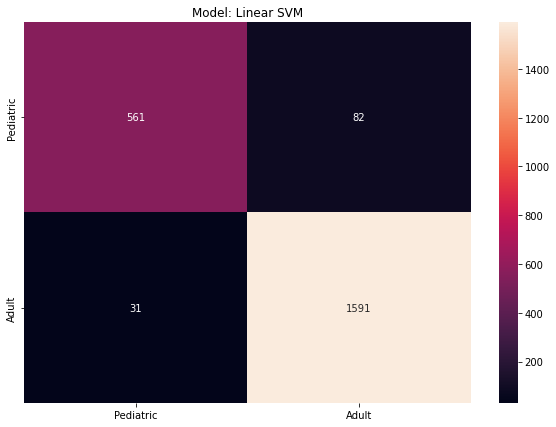

In [67]:
predictions = KSVC_clf.predict(X_test_new)

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

cfn_matrix_kernalized_svm = confusion_matrix(y_test_new,predictions)

x_axis_labels = ['Pediatric', 'Adult'] 
y_axis_labels = ['Pediatric', 'Adult']


plt.figure(figsize = (10,7))
plt.title('Model: Linear SVM')
sns.heatmap(cfn_matrix_kernalized_svm, annot = True, fmt='d', xticklabels=x_axis_labels, yticklabels=y_axis_labels)

In [68]:
target_names = ['Pediatric', 'Adult']
print(classification_report(y_test_new, y_pred_test, target_names=target_names))

              precision    recall  f1-score   support

   Pediatric       0.95      0.87      0.91       643
       Adult       0.95      0.98      0.97      1622

    accuracy                           0.95      2265
   macro avg       0.95      0.93      0.94      2265
weighted avg       0.95      0.95      0.95      2265



# Gradient boosting model

In [69]:
from sklearn.ensemble import GradientBoostingClassifier
gbc = GradientBoostingClassifier(learning_rate=0.1, max_features='sqrt',subsample=0.8,random_state=10)

param_grid ={
            'min_samples_split': range(100, 500, 50),
           'n_estimators':range(20,81,10),
           'min_samples_leaf': range(10,100,10),
           'max_depth': range(5,8,1)}


grid_search = GridSearchCV(gbc, param_grid, cv=5, scoring='precision_macro', return_train_score=True)
grid_search.fit(X_train_new,y_train_new)

GridSearchCV(cv=5,
             estimator=GradientBoostingClassifier(max_features='sqrt',
                                                  random_state=10,
                                                  subsample=0.8),
             param_grid={'max_depth': range(5, 8),
                         'min_samples_leaf': range(10, 100, 10),
                         'min_samples_split': range(100, 500, 50),
                         'n_estimators': range(20, 81, 10)},
             return_train_score=True, scoring='precision_macro')

In [70]:
print(grid_search.best_params_)

{'max_depth': 6, 'min_samples_leaf': 20, 'min_samples_split': 150, 'n_estimators': 50}


In [71]:
gbc = GradientBoostingClassifier(n_estimators=50, learning_rate=0.1, min_samples_split=150,min_samples_leaf=20,max_depth=6,max_features='sqrt',subsample=0.8,random_state=10)
gbc.fit(X_train_new, y_train_new)

print('Train score: ', gbc.score(X_train_new,y_train_new))
print('Test score: ', gbc.score(X_test_new, y_test_new))


Train score:  0.9715093518921271
Test score:  0.9567328918322295


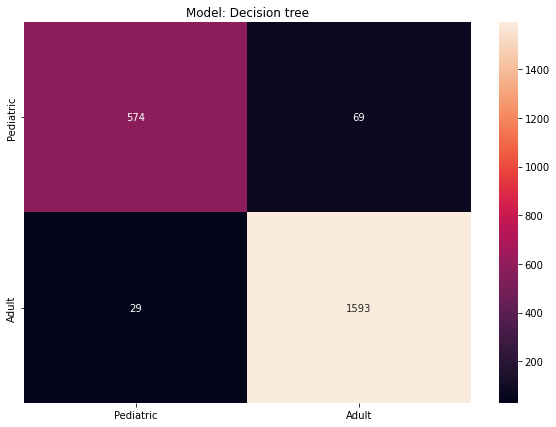

In [72]:
predictions_gbc = gbc.predict(X_test_new)

cfn_matrix_gbc = confusion_matrix(y_test_new,predictions_gbc)

x_axis_labels = ['Pediatric', 'Adult'] 
y_axis_labels = ['Pediatric', 'Adult']


plt.figure(figsize = (10,7))
plt.title('Model: Decision tree')
sns.heatmap(cfn_matrix_gbc, annot = True, fmt='d', xticklabels=x_axis_labels, yticklabels=y_axis_labels)

In [73]:
target_names = ['Pediatric', 'Adult']
print(classification_report(y_test_new, predictions_gbc, target_names=target_names))

              precision    recall  f1-score   support

   Pediatric       0.95      0.89      0.92       643
       Adult       0.96      0.98      0.97      1622

    accuracy                           0.96      2265
   macro avg       0.96      0.94      0.95      2265
weighted avg       0.96      0.96      0.96      2265



In [74]:
feature_importances_gbc = pd.DataFrame(gbc.feature_importances_,
                                   index = X_train_new.columns,
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)

In [75]:
feature_importances_gbc.head(10)


,importance
0,
IGF2,0.136635
TUSC3,0.127543
KHDRBS2,0.100556
CTHRC1,0.092883
RTN1,0.066646
SNAR-B1,0.065645
COL1A2,0.055535
LOC650226,0.048329
NEFL,0.045594


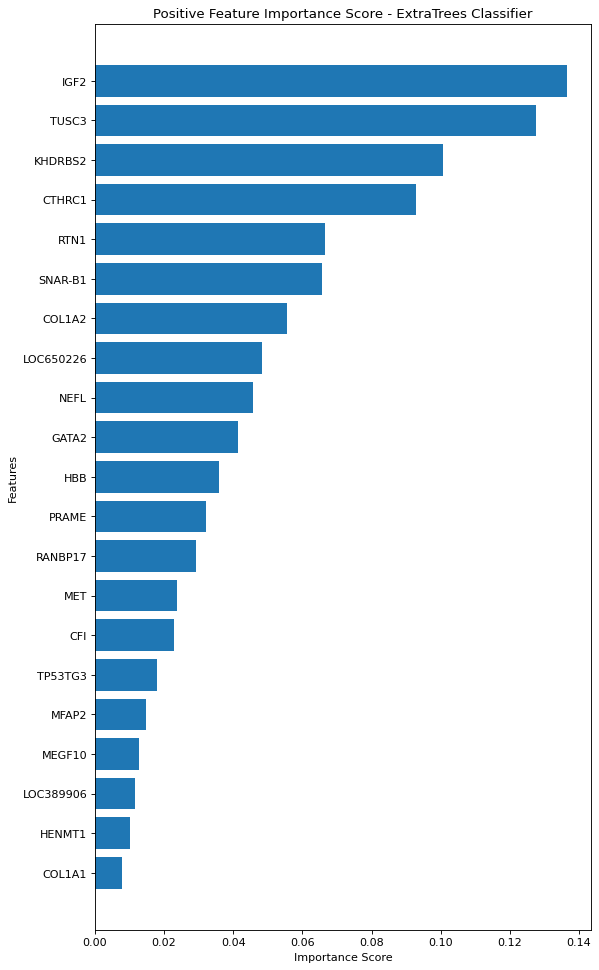

In [76]:
pos_features = feature_importances_gbc.loc[feature_importances_gbc.importance > 0]

num = np.min([50, len(pos_features)])
ylocs = np.arange(num)
# get the feature importance for top num and sort in reverse order
values_to_plot = pos_features.iloc[:num].values.ravel()[::-1]
feature_labels = list(pos_features.iloc[:num].index)[::-1]

plt.figure(num=None, figsize=(8, 15), dpi=80, facecolor='w', edgecolor='k');
plt.barh(ylocs, values_to_plot, align = 'center')
plt.ylabel('Features')
plt.xlabel('Importance Score')
plt.title('Positive Feature Importance Score - ExtraTrees Classifier')
plt.yticks(ylocs, feature_labels)
plt.show()

# XGBoost model

In [77]:
from xgboost import XGBClassifier
import xgboost as xgb

xgbc = XGBClassifier()

xgbc.fit(X_train_new, y_train_new)

y_train_preds = xgbc.predict(X_train_new)
y_test_preds = xgbc.predict(X_test_new)

xgb_train_precision_score = precision_score(y_train_new, y_train_preds, average='binary')
xgb_test_precision_score = precision_score(y_test_new, y_test_preds, average='binary')

print('Train Precision score: {}'
      .format(xgb_train_precision_score))
print('Test Precision score: {}'
      .format(xgb_test_precision_score))


Train Precision score: 0.968371268105232
Test Precision score: 0.9528920691711389


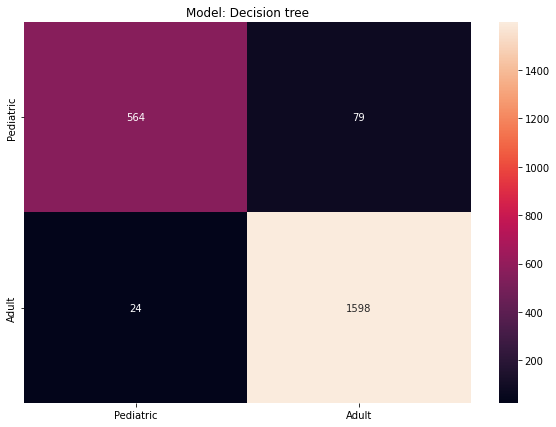

In [78]:
predictions_xgbc = xgbc.predict(X_test_new)

cfn_matrix_xgbc = confusion_matrix(y_test_new,predictions_xgbc)

x_axis_labels = ['Pediatric', 'Adult'] 
y_axis_labels = ['Pediatric', 'Adult']


plt.figure(figsize = (10,7))
plt.title('Model: Decision tree')
sns.heatmap(cfn_matrix_xgbc, annot = True, fmt='d', xticklabels=x_axis_labels, yticklabels=y_axis_labels)

In [79]:
target_names = ['Pediatric', 'Adult']
print(classification_report(y_test_new, predictions_xgbc, target_names=target_names))

              precision    recall  f1-score   support

   Pediatric       0.96      0.88      0.92       643
       Adult       0.95      0.99      0.97      1622

    accuracy                           0.95      2265
   macro avg       0.96      0.93      0.94      2265
weighted avg       0.95      0.95      0.95      2265



In [80]:
feature_importances_xgbc = pd.DataFrame(xgbc.feature_importances_,
                                   index = X_train_new.columns,
                                    columns=['importance']).sort_values('importance',
                                                                        ascending=False)

In [81]:
feature_importances_xgbc.index


Index(['TUSC3', 'IGF2', 'SNAR-B1', 'CTHRC1', 'RTN1', 'PRAME', 'LOC650226',
       'COL1A2', 'KHDRBS2', 'HBB', 'NEFL', 'TP53TG3', 'CFI', 'MFAP2', 'MEGF10',
       'RANBP17', 'MET', 'GATA2', 'COL1A1', 'HENMT1', 'LOC389906'],
      dtype='object', name=0)

In [ ]:


a = feature_importances_xgbc.index
b = feature_importances_gbc.index
c = feature_importances_dt.index
d = feature_importances_rf.index


# common_elements = list(set(a).intersection(set(b)))

In [ ]:
a = a[0:50]
b = b[0:50]
c = c[0:50]
d = d[0:50]

common_elements = list(set(a).intersection(set(b), set(c), set(d)))


In [ ]:
len(common_elements)

21

# Test: MLP performance

In [82]:
print(X_train_new.shape, X_test_new.shape, y_train_new.shape, y_test_new.shape)

# determine the number of input features
n_features = X_train_new.shape[1]

(4598, 21) (2265, 21) (4598,) (2265,)


In [83]:
n_features

21

In [84]:
def evaluate_model(history,X_test,y_test,model):
    scores = model.evaluate((X_test),y_test, verbose=0)
    print("Accuracy: %.2f%%" % (scores[1]*100))
    
    print(history)
    fig1, ax_acc = plt.subplots()
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Model - Accuracy')
    plt.legend(['Training', 'Validation'], loc='lower right')
    plt.show()
    
    fig2, ax_loss = plt.subplots()
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Model- Loss')
    plt.legend(['Training', 'Validation'], loc='upper right')
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.show()
    target_names=['1','2', '3']
    
    y_true=[]
    for element in y_test:
        y_true.append(np.argmax(element))
    prediction_proba=model.predict(X_test)
    prediction=np.argmax(prediction_proba,axis=1)
    cnf_matrix = confusion_matrix(y_true, prediction)

In [85]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [86]:
from keras.layers import Dropout
# create model
model2 = Sequential()
model2.add(Dense(40, input_dim=21, activation='relu'))
# model2.add(Dropout(0.2))
model2.add(Dense(32, activation='relu'))
model2.add(Dense(16, activation='relu'))
model2.add(Dense(1, activation='sigmoid'))

In [87]:
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])


In [88]:
history_mlp = model2.fit(X_train_new, y_train_new, epochs=30, batch_size=5, validation_split=0.1)


Epoch 1/30
828/828 [==============================] - 7s 4ms/step - loss: 0.2223 - accuracy: 0.9265 - val_loss: 0.1296 - val_accuracy: 0.9522
Epoch 2/30
828/828 [==============================] - 3s 4ms/step - loss: 0.1214 - accuracy: 0.9546 - val_loss: 0.1190 - val_accuracy: 0.9652
Epoch 3/30
828/828 [==============================] - 3s 4ms/step - loss: 0.1110 - accuracy: 0.9596 - val_loss: 0.1339 - val_accuracy: 0.9565
Epoch 4/30
828/828 [==============================] - 3s 4ms/step - loss: 0.1024 - accuracy: 0.9635 - val_loss: 0.1135 - val_accuracy: 0.9565
Epoch 5/30
828/828 [==============================] - 3s 4ms/step - loss: 0.0962 - accuracy: 0.9659 - val_loss: 0.1194 - val_accuracy: 0.9587
Epoch 6/30
828/828 [==============================] - 4s 5ms/step - loss: 0.0904 - accuracy: 0.9667 - val_loss: 0.1445 - val_accuracy: 0.9543
Epoch 7/30
828/828 [==============================] - 3s 4ms/step - loss: 0.0893 - accuracy: 0.9676 - val_loss: 0.1322 - val_accuracy: 0.9609
Epoch 

Accuracy: 95.41%


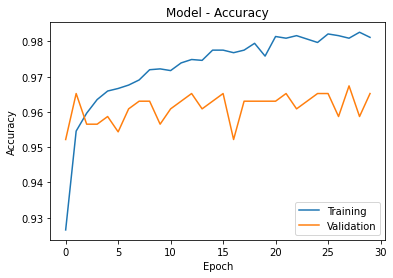

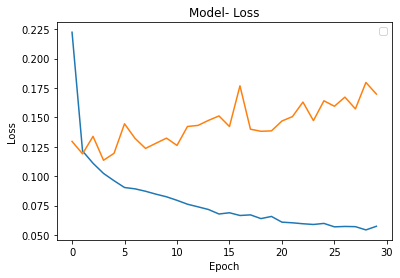

In [89]:
evaluate_model(history_mlp,X_test_new,y_test_new,model2)
y_pred = model2.predict(X_test_new)

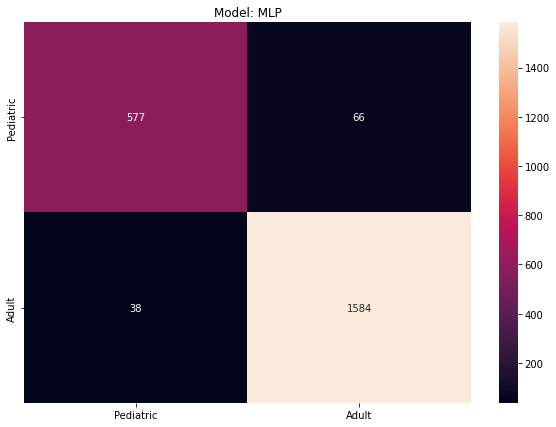

In [90]:
prediction_mlp = model2.predict(X_test_new)

prediction_mlp = np.round(prediction_mlp)
cfn_matrix_mlp = confusion_matrix(y_test_new, prediction_mlp)
plt.figure(figsize = (10,7))
plt.title('Model: MLP')

xticklabels = ['Pediatric', 'Adult'] 
yticklabels = ['Pediatric', 'Adult'] 
sns.heatmap(cfn_matrix_mlp, annot = True, fmt= 'd', xticklabels = xticklabels, yticklabels=yticklabels)

In [91]:
from sklearn.metrics import classification_report

target_names = ['Pediatric', 'Adult']

print(classification_report(y_test_new, prediction_mlp, target_names=target_names))


              precision    recall  f1-score   support

   Pediatric       0.94      0.90      0.92       643
       Adult       0.96      0.98      0.97      1622

    accuracy                           0.95      2265
   macro avg       0.95      0.94      0.94      2265
weighted avg       0.95      0.95      0.95      2265



In [92]:
from torch.optim import Adam, SGD
from sklearn.metrics import confusion_matrix
from keras.layers import Dense, Convolution1D, MaxPool1D, Flatten, Dropout, Embedding, Input, LSTM, Bidirectional, GlobalAveragePooling1D
from keras.models import Model
from tensorflow import keras
from tensorflow.keras import layers
from keras.layers import BatchNormalization
import keras
from matplotlib.pyplot import figure
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import seaborn as sns
import tensorflow as tf

In [95]:
def network(X_train,y_train):
    im_shape=(X_train_new.shape[1],X_train_new.shape[2])
    inputs_cnn=Input(shape=(im_shape), name='inputs_cnn')
    
    # Your code
    conv1=Convolution1D(64, 6, activation='relu', input_shape=im_shape, name='Conv1D_1')(inputs_cnn)
    conv1=BatchNormalization(name='BatchNormalization_1')(conv1)
    pool1=MaxPool1D(pool_size=(2), strides=(4), padding="same", name='MaxPool1D_1')(conv1)
    drop = Dropout(0.2)
    conv2=Convolution1D(128, 12, activation='relu', input_shape=im_shape, name='Conv1D_2')(pool1)
    conv2=BatchNormalization(name='BatchNormalization_2')(conv2)
    pool2=MaxPool1D(pool_size=(2), strides=(4), padding="same", name='MaxPool1D_2')(conv2)
    drop = Dropout(0.5)
    flatten=Flatten()(pool2)
    dense_1 = Dense(64, activation='relu', name='Dense_1')(flatten)
    drop = Dropout(0.5)
    dense_2 = Dense(32, activation='relu', name='Dense_2')(dense_1)
    main_output = Dense(units = 1, activation='sigmoid', name='main_output')(dense_2)

    model = Model(inputs= inputs_cnn, outputs=main_output)
    opt = tf.keras.optimizers.Adam(learning_rate=0.001)
    model.compile(optimizer=opt, loss='binary_crossentropy',metrics = ['accuracy'])

    return(model)

In [99]:
X_train_new.shape

(4598, 21)

In [96]:
model_combine_data = network(X_train_new, y_train_new)
print(model_combine_data.summary())

IndexError: ignored

In [ ]:
es = EarlyStopping(monitor='val_loss', patience=10, verbose=1)

In [ ]:
# Train you model
history = model_combine_data.fit(decoded_train, y_train,epochs=100, batch_size=32,validation_data=(decoded_val,y_val), callbacks = [es])

Epoch 1/100
108/108 [==============================] - 4s 25ms/step - loss: 0.0610 - accuracy: 0.9780 - val_loss: 0.1412 - val_accuracy: 0.9617
Epoch 2/100
108/108 [==============================] - 2s 22ms/step - loss: 0.0191 - accuracy: 0.9927 - val_loss: 0.1156 - val_accuracy: 0.9583
Epoch 3/100
108/108 [==============================] - 2s 21ms/step - loss: 0.0115 - accuracy: 0.9965 - val_loss: 0.0855 - val_accuracy: 0.9574
Epoch 4/100
108/108 [==============================] - 2s 22ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 0.0444 - val_accuracy: 0.9800
Epoch 5/100
108/108 [==============================] - 2s 21ms/step - loss: 9.1176e-05 - accuracy: 1.0000 - val_loss: 0.0185 - val_accuracy: 0.9896
Epoch 6/100
108/108 [==============================] - 2s 22ms/step - loss: 3.1403e-05 - accuracy: 1.0000 - val_loss: 0.0121 - val_accuracy: 0.9939
Epoch 7/100
108/108 [==============================] - 2s 21ms/step - loss: 2.4331e-05 - accuracy: 1.0000 - val_loss: 0.0136 - v

Accuracy: 99.03%


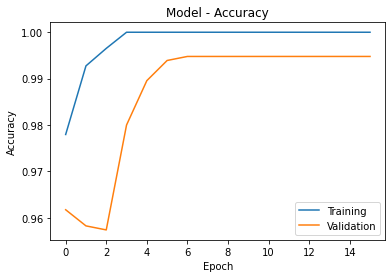

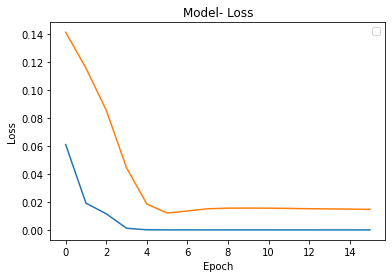

In [ ]:
# Print result and plot accuracy and loss
evaluate_model(history,decoded_test,y_test,model_combine_data)
y_pred = model_combine_data.predict(decoded_test)

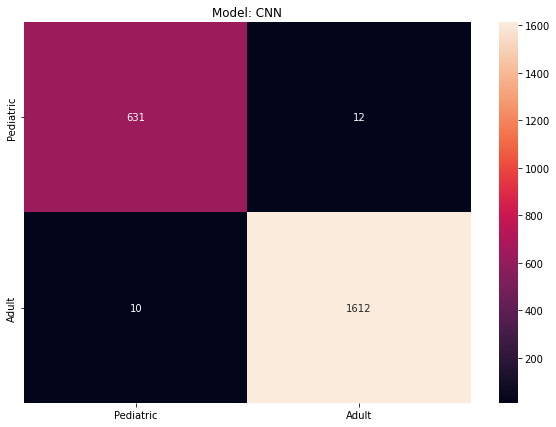

In [ ]:
prediction_cnn = model_combine_data.predict(decoded_test)
prediction_cnn = np.round(prediction_cnn)
cfn_matrix_cnn = confusion_matrix(y_test, prediction_cnn)
plt.figure(figsize = (10,7))
plt.title('Model: CNN')
xticklabels = ['Pediatric', 'Adult'] 
yticklabels = ['Pediatric', 'Adult'] 
sns.heatmap(cfn_matrix_cnn, annot = True, fmt = 'd', xticklabels = xticklabels, yticklabels=yticklabels)

In [ ]:
from sklearn.metrics import classification_report

target_names = ['Pediatric', 'Adult']

print(classification_report(y_test, prediction_cnn, target_names= target_names))



              precision    recall  f1-score   support

   Pediatric       0.98      0.98      0.98       643
       Adult       0.99      0.99      0.99      1622

    accuracy                           0.99      2265
   macro avg       0.99      0.99      0.99      2265
weighted avg       0.99      0.99      0.99      2265

